In [2]:
%load_ext autoreload
%autoreload 1

# Clustering

Run this section using ```spherecluster``` env

## Demo

In [2]:
import pickle

start_year = 1950
end_year = 1959
d = 100
w = 10

with open(f'../../data/decades/{start_year}_to_{end_year}/VIDs_{d}feat_{w}context_win_size.pkl', 
          'rb') as f:
        VIDs = pickle.load(f)

with open(f'../../data/decades/{start_year}_to_{end_year}/vectors_{d}feat_{w}context_win_size.pkl', 
            'rb') as f:
        vectors = pickle.load(f)

In [4]:
from spherecluster import VonMisesFisherMixture
K = 26
vmf_hard = VonMisesFisherMixture(n_clusters=K, posterior_type='hard')
vmf_hard.fit(vectors)

/home/lyuzhuoqi/miniconda3/envs/spherecluster/lib/python3.7/site-packages/spherecluster-0.1.7-py3.7.egg/spherecluster/von_mises_fisher_mixture.py:344: RuntimeWarning: invalid value encountered in double_scalars
/home/lyuzhuoqi/miniconda3/envs/spherecluster/lib/python3.7/site-packages/spherecluster-0.1.7-py3.7.egg/spherecluster/von_mises_fisher_mixture.py:288: RuntimeWarning: divide by zero encountered in log


VonMisesFisherMixture(copy_x=True, force_weights=None, init='random-class',
           max_iter=300, n_clusters=26, n_init=10, n_jobs=1,
           normalize=True, posterior_type='hard', random_state=None,
           tol=1e-06, verbose=False)

In [6]:
vmf_hard.labels_

array([24., 24.,  5., ...,  3., 10., 18.])

In [10]:
vmf_hard.cluster_centers_

array([[-0.02536224,  0.05834802,  0.09436964, ..., -0.26021897,
        -0.07516032, -0.0265524 ],
       [ 0.18344244,  0.04394991,  0.0201354 , ..., -0.07530757,
        -0.02505317, -0.06111693],
       [ 0.09488648,  0.03388972,  0.07732126, ..., -0.04086915,
         0.00894189,  0.00271343],
       ...,
       [ 0.05114527, -0.03031565, -0.06258504, ..., -0.13360498,
         0.08040952, -0.00753947],
       [-0.00095778,  0.08270476,  0.14501849, ..., -0.09827794,
        -0.09393919,  0.03311429],
       [ 0.0016818 , -0.03820678,  0.04429099, ..., -0.2287281 ,
         0.00208398, -0.13259435]])

## Loop

In [14]:
import pickle
from spherecluster import VonMisesFisherMixture
d, w = 100, 10
K = 26

for start_year, end_year in zip([1950, 1960, 1970, 1980, 1990, 2000, 2010], 
                                [1959, 1969, 1979, 1989, 1999, 2009, 2021]):
    print(f'working on {start_year}s')
    with open(f'../../data/decades/{start_year}_to_{end_year}/vectors_{d}feat_{w}context_win_size.pkl', 
            'rb') as f:
           vectors = pickle.load(f)
    vmf_hard = VonMisesFisherMixture(n_clusters=K, posterior_type='hard')
    vmf_hard.fit(vectors)
    with open(f'../../data/decades/{start_year}_to_{end_year}/cluster_labels_{d}feat_{w}context_win_size.pkl', 
            'wb') as f:
           pickle.dump(vmf_hard.labels_,f)
    with open(f'../../data/decades/{start_year}_to_{end_year}/cluster_centers_{d}feat_{w}context_win_size.pkl', 
                'wb') as f:
            pickle.dump(vmf_hard.cluster_centers_, f)
    print(f'finish dumping {start_year}s')

working on 1950s


/home/lyuzhuoqi/miniconda3/envs/spherecluster/lib/python3.7/site-packages/spherecluster-0.1.7-py3.7.egg/spherecluster/von_mises_fisher_mixture.py:344: RuntimeWarning: invalid value encountered in double_scalars
/home/lyuzhuoqi/miniconda3/envs/spherecluster/lib/python3.7/site-packages/spherecluster-0.1.7-py3.7.egg/spherecluster/von_mises_fisher_mixture.py:288: RuntimeWarning: divide by zero encountered in log


finish dumping 1950s
working on 1960s
finish dumping 1960s
working on 1970s
finish dumping 1970s
working on 1980s
finish dumping 1980s
working on 1990s
finish dumping 1990s
working on 2000s
finish dumping 2000s
working on 2010s
finish dumping 2010s


# Analysis

Run this section using any env with ```p2v```

## Demo

In [5]:
import sys
sys.path.append('diachronic-p2v')

%aimport p2v
model = p2v.P2V()

data_dir:  /mnt/d/projects/diachronic-p2v/data
2024-11-16 13:01:34 -- start loading Mag_venue_info_df
2024-11-16 13:01:35 -- finish.
2024-11-16 13:01:35 -- start loading labeled_journal_info_df
2024-11-16 13:01:35 -- finish.


In [38]:
import pickle

start_year, end_year = 1950, 1959
d, w = 100, 10

wv = model.load_wv(start_year, end_year, d, w)
all_VIDs = wv.index_to_key
all_vectors = wv.get_normed_vectors()
VIDs_labeled = model.load_VID_labeled(start_year, end_year, d, w)

with open(f'diachronic-p2v/data/decades/{start_year}_to_{end_year}/cluster_labels_{d}feat_{w}context_win_size.pkl', 
        'rb') as f:
        vmf_labels = pickle.load(f)
with open(f'diachronic-p2v/data/decades/{start_year}_to_{end_year}/cluster_centers_{d}feat_{w}context_win_size.pkl', 
        'rb') as f:
        cluster_centers = pickle.load(f)

2024-11-16 13:27:37 -- start loading word vectors...
2024-11-16 13:27:37 -- word vectors loaded, and its shape is: (1645, 100)
2024-11-16 13:27:37 -- start loading VID_labeled...
2024-11-16 13:27:37 -- finish.


In [ ]:
len(all_VIDs)
len(VIDs_labeled['VID'])
len(vmf_labels)

1645

In [ ]:
valid_VID_idx = [all_VIDs.index(vid) for vid in VIDs_labeled['VID']]
len(valid_VID_idx)

1253

In [ ]:
import pandas as pd

cluster_df = pd.DataFrame({'VID': [all_VIDs[idx] for idx in valid_VID_idx], 
                           'Scopus_label': VIDs_labeled['label'],
                           'cluster_label': [vmf_labels[idx] for idx in valid_VID_idx]})

In [32]:
from clusim.clustering import Clustering
import clusim.sim as sim

# Key: row index, val: value of 'area' column
dict_original = {index: [row['Scopus_label']] for index, row in cluster_df.iterrows()}
# Key: row index, val: value of 'cluster_label' column
dict_clustering = {index: [row['cluster_label']] for index, row in cluster_df.iterrows()}

c_original = Clustering(elm2clu_dict = dict_original)
c_clustering = Clustering(elm2clu_dict = dict_clustering)

elementScores, relabeled_elements = sim.element_sim_elscore(c_original, c_clustering, alpha = 0.9)
cluster_df['sim_score'] = elementScores

In [42]:
import numpy as np

vectors = all_vectors[valid_VID_idx]
distances = 1 - np.dot(vectors, cluster_centers.T)
closest_center_distances = np.min(distances, axis=1)
cluster_df['closest_center_distance'] = closest_center_distances


<Axes: xlabel='sim_score', ylabel='Count'>

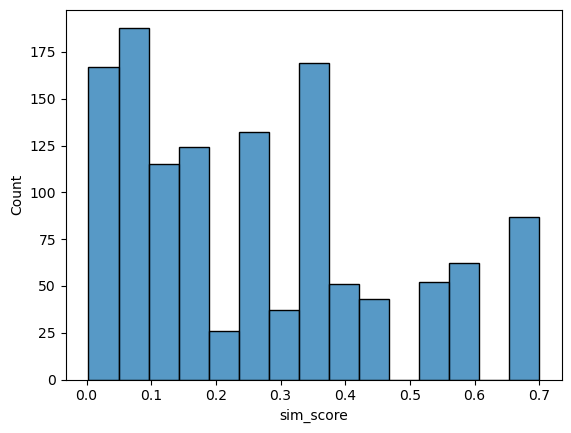

In [45]:
import seaborn as sns

sns.histplot(cluster_df.sim_score)

<Axes: xlabel='closest_center_distance', ylabel='Count'>

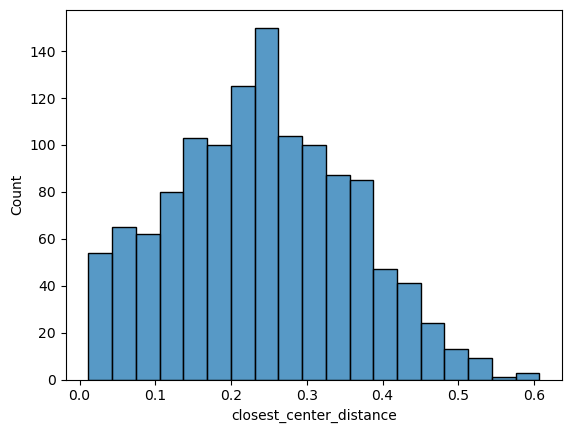

In [46]:
sns.histplot(cluster_df.closest_center_distance)

In [55]:
all_wv_2d = model.load_wv_2d(start_year, end_year, d, w)
wv_2d = pd.DataFrame(all_wv_2d).loc[valid_VID_idx,:]

plot_df = pd.merge(cluster_df, wv_2d, on='VID')

2024-11-16 13:44:59 -- start loading wv_2d...
2024-11-16 13:44:59 -- finish.


In [56]:
plot_df

VID                                  Scopus_label  \
0     1.377736e+08                             Multidisciplinary   
1     1.402520e+08  Biochemistry, Genetics and Molecular Biology   
2     1.111554e+08  Biochemistry, Genetics and Molecular Biology   
3     5.486237e+07                         Physics and Astronomy   
4     3.880285e+06                             Multidisciplinary   
...            ...                                           ...   
1248  1.079145e+08                               Social Sciences   
1249  1.769740e+08                           Arts and Humanities   
1250  2.764621e+09          Agricultural and Biological Sciences   
1251  2.483219e+09          Agricultural and Biological Sciences   
1252  9.874172e+07                           Arts and Humanities   

      cluster_label  sim_score  closest_center_distance      x_val      y_val  
0              18.0   0.065789                 0.422928 -10.123510  -9.442773  
1               5.0   0.185714                 0.253940 -12.032176 -11.015632  
2               5.0   0.185714                 0.248420   0.031881 -28.195047  
3               0.0   0.666667                 0.155218  19.293009 -30.735680  
4              18.0   0.065789                 0.437083  -9.144196  -7.420030  
...             ...        ...                      ...        ...        ...  
1248           12.0   0.186992                 0.073006  20.291378  19.929705  
1249           12.0   0.574074                 0.108681  32.771862  14.552918  
1250            2.0   0.177215                 0.096499 -31.217905 -25.995714  
1251            2.0   0.177215                 0.106651 -30.484240 -26.243330  
1252            1.0   0.083333                 0.175729  19.708525  27.156511  

[1253 rows x 7 columns]

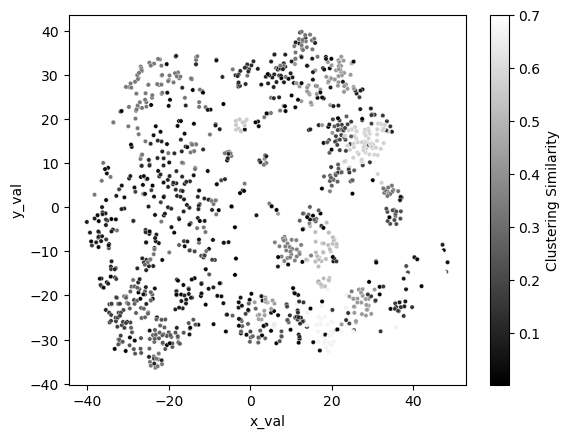

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.gca()
scatter = sns.scatterplot(data=plot_df, x='x_val', y='y_val', 
                          hue='sim_score', palette='gray', s=10,
                          ax=ax, legend=False)
# 添加 color bar
norm = plt.Normalize(plot_df["sim_score"].min(), plot_df["sim_score"].max())  # 归一化颜色范围
sm = plt.cm.ScalarMappable(cmap="gray", norm=norm)  # 定义颜色映射
sm.set_array([plot_df['sim_score']])  # 颜色映射所需的 array
plt.colorbar(sm, label="Clustering Similarity", ax=ax)  # 添加 color bar，并设置标签

## Loop

### Generate and store data

In [10]:
%load_ext autoreload
%autoreload 1
import sys
sys.path.append('diachronic-p2v')
%aimport p2v
import pickle
import pandas as pd
from clusim.clustering import Clustering
import clusim.sim as sim
import numpy as np

model = p2v.P2V()
d, w = 100, 10
cluster_df_list = []

for start_year, end_year in zip([1950, 1960, 1970, 1980, 1990, 2000, 2010], 
                                [1959, 1969, 1979, 1989, 1999, 2009, 2021]):
        print('------------------------------------')
        print(f'working on {start_year}s')
        wv = model.load_wv(start_year, end_year, d, w)
        all_VIDs = wv.index_to_key
        all_vectors = wv.get_normed_vectors()
        VIDs_labeled = model.load_VID_labeled(start_year, end_year, d, w)
        with open(f'diachronic-p2v/data/decades/{start_year}_to_{end_year}/cluster_labels_{d}feat_{w}context_win_size.pkl', 'rb') as f:
                vmf_labels = pickle.load(f)
        with open(f'diachronic-p2v/data/decades/{start_year}_to_{end_year}/cluster_centers_{d}feat_{w}context_win_size.pkl', 'rb') as f:
                cluster_centers = pickle.load(f)
        valid_VID_idx = [all_VIDs.index(vid) for vid in VIDs_labeled['VID']]
        cluster_df = pd.DataFrame({'VID': [all_VIDs[idx] for idx in valid_VID_idx], 
                                   'Scopus_label': VIDs_labeled['label'],
                                   'cluster_label': [vmf_labels[idx] for idx in valid_VID_idx]})
        print('------------------------------------')
        print('Start compute sim score ....')
        # Key: row index, val: value of 'area' column
        dict_original = {index: [row['Scopus_label']] for index, row in cluster_df.iterrows()}
        # Key: row index, val: value of 'cluster_label' column
        dict_clustering = {index: [row['cluster_label']] for index, row in cluster_df.iterrows()}

        c_original = Clustering(elm2clu_dict = dict_original)
        c_clustering = Clustering(elm2clu_dict = dict_clustering)

        elementScores, relabeled_elements = sim.element_sim_elscore(c_original, c_clustering, alpha = 0.9)
        cluster_df['sim_score'] = elementScores
        print('------------------------------------')
        print('Start calculating closest center distance ....')
        vectors = all_vectors[valid_VID_idx]
        distances = 1 - np.dot(vectors, cluster_centers.T)
        closest_center_distances = np.min(distances, axis=1)
        cluster_df['closest_center_distance'] = closest_center_distances
        print('------------------------------------')
        print('Start merge 2D projection ....')
        all_wv_2d = model.load_wv_2d(start_year, end_year, d, w)
        wv_2d = pd.DataFrame(all_wv_2d).loc[valid_VID_idx,:]
        plot_df = pd.merge(cluster_df, wv_2d, on='VID')
        print('------------------------------------')
        print('Finsihed')
        cluster_df_list.append(plot_df)

with open(f'diachronic-p2v/figures/vectors/cluter_df_list.pkl', 'wb') as f:
        pickle.dump(cluster_df_list, f)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
data_dir:  /mnt/d/projects/diachronic-p2v/data
2024-11-17 16:30:27 -- start loading Mag_venue_info_df
2024-11-17 16:30:27 -- finish.
2024-11-17 16:30:27 -- start loading labeled_journal_info_df
2024-11-17 16:30:27 -- finish.
------------------------------------
working on 1950s
2024-11-17 16:30:27 -- start loading word vectors...
2024-11-17 16:30:27 -- word vectors loaded, and its shape is: (1645, 100)
2024-11-17 16:30:27 -- start loading VID_labeled...
2024-11-17 16:30:27 -- finish.
------------------------------------
Start clusting ....
------------------------------------
Start calculating closest center distance ....
------------------------------------
Start merge 2D projection ....
2024-11-17 16:30:27 -- start loading wv_2d...
2024-11-17 16:30:27 -- finish.
------------------------------------
Finsihed
------------------------------------
working on 1960s
2024-11-17 16:30:27 -- start loading 

### Plots

<Figure size 640x480 with 0 Axes>

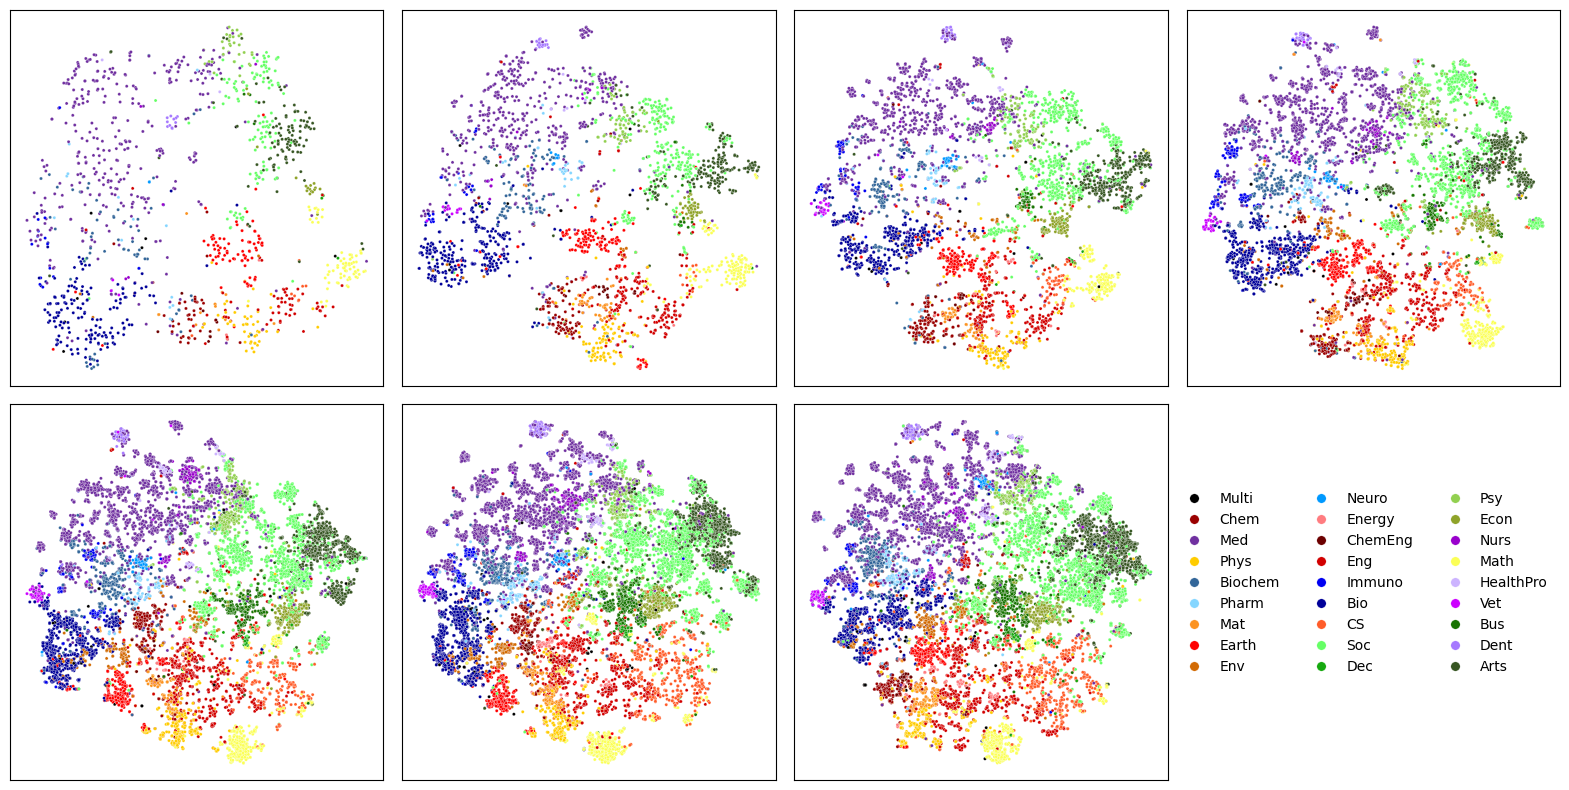

In [ ]:
decades = ['1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s']

fig = plt.figure(layout='constrained')
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
plt.subplots_adjust(wspace=0.05, hspace=0.05)
axes = axes.flatten()
for i, cluster_df in enumerate(cluster_df_list):
        ax = axes[i]
        if i in [1, 2, 3]:
                cluster_df['x_val'] = -1 * cluster_df['x_val']
        scatter = sns.scatterplot(data=cluster_df, x='x_val', y='y_val', 
                                  hue='Scopus_label', palette=model.discipline2color, s=5,
                                  ax=ax)
        ax.legend().set_visible(False)
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_xticks([])
        ax.set_yticks([])

axes[-1].axis('off')
# Add legend with labels mapped using model.disc2abbr
handles, labels = scatter.get_legend_handles_labels()
mapped_labels = [model.disc2abbr[label] for label in labels]
ax.legend(handles, mapped_labels,
          bbox_to_anchor=(1., 0.8), loc='upper left', ncol=3, frameon=False, 
          markerscale=3)

In [11]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.optimize import linear_sum_assignment
import numpy as np

def match_labels_by_centroids(labels1, labels2, data):
    """
    使用聚类质心的余弦相似度匹配两组标签
    :param labels1: 第一组聚类标签
    :param labels2: 第二组聚类标签
    :param data: 样本数据，用于计算聚类中心
    """
    unique_labels1 = np.unique(labels1)
    unique_labels2 = np.unique(labels2)

    centroids1 = []
    centroids2 = []

    # 计算每个聚类的质心
    for label in unique_labels1:
        centroids1.append(data[labels1 == label].mean(axis=0))
    for label in unique_labels2:
        centroids2.append(data[labels2 == label].mean(axis=0))

    # 计算余弦相似度
    similarity_matrix = cosine_similarity(centroids1, centroids2)

    # 使用匈牙利算法匹配
    row_ind, col_ind = linear_sum_assignment(-similarity_matrix)  # 负号用于最大化匹配

    # 返回匹配关系
    mapping = {unique_labels1[row]: unique_labels2[col] for row, col in zip(row_ind, col_ind)}
    return mapping, similarity_matrix

2024-11-18 03:09:46 -- start loading word vectors...
2024-11-18 03:09:46 -- word vectors loaded, and its shape is: (1645, 100)
2024-11-18 03:09:46 -- start loading word vectors...
2024-11-18 03:09:46 -- word vectors loaded, and its shape is: (3116, 100)
2024-11-18 03:09:46 -- start loading word vectors...
2024-11-18 03:09:46 -- word vectors loaded, and its shape is: (5686, 100)
2024-11-18 03:09:46 -- start loading word vectors...
2024-11-18 03:09:46 -- word vectors loaded, and its shape is: (9337, 100)
2024-11-18 03:09:46 -- start loading word vectors...
2024-11-18 03:09:46 -- word vectors loaded, and its shape is: (15019, 100)
2024-11-18 03:09:47 -- start loading word vectors...
2024-11-18 03:09:47 -- word vectors loaded, and its shape is: (27460, 100)
2024-11-18 03:09:48 -- start loading word vectors...
2024-11-18 03:09:48 -- word vectors loaded, and its shape is: (37594, 100)


(0.0, 1.0, 0.0, 1.0)

<Figure size 640x480 with 0 Axes>

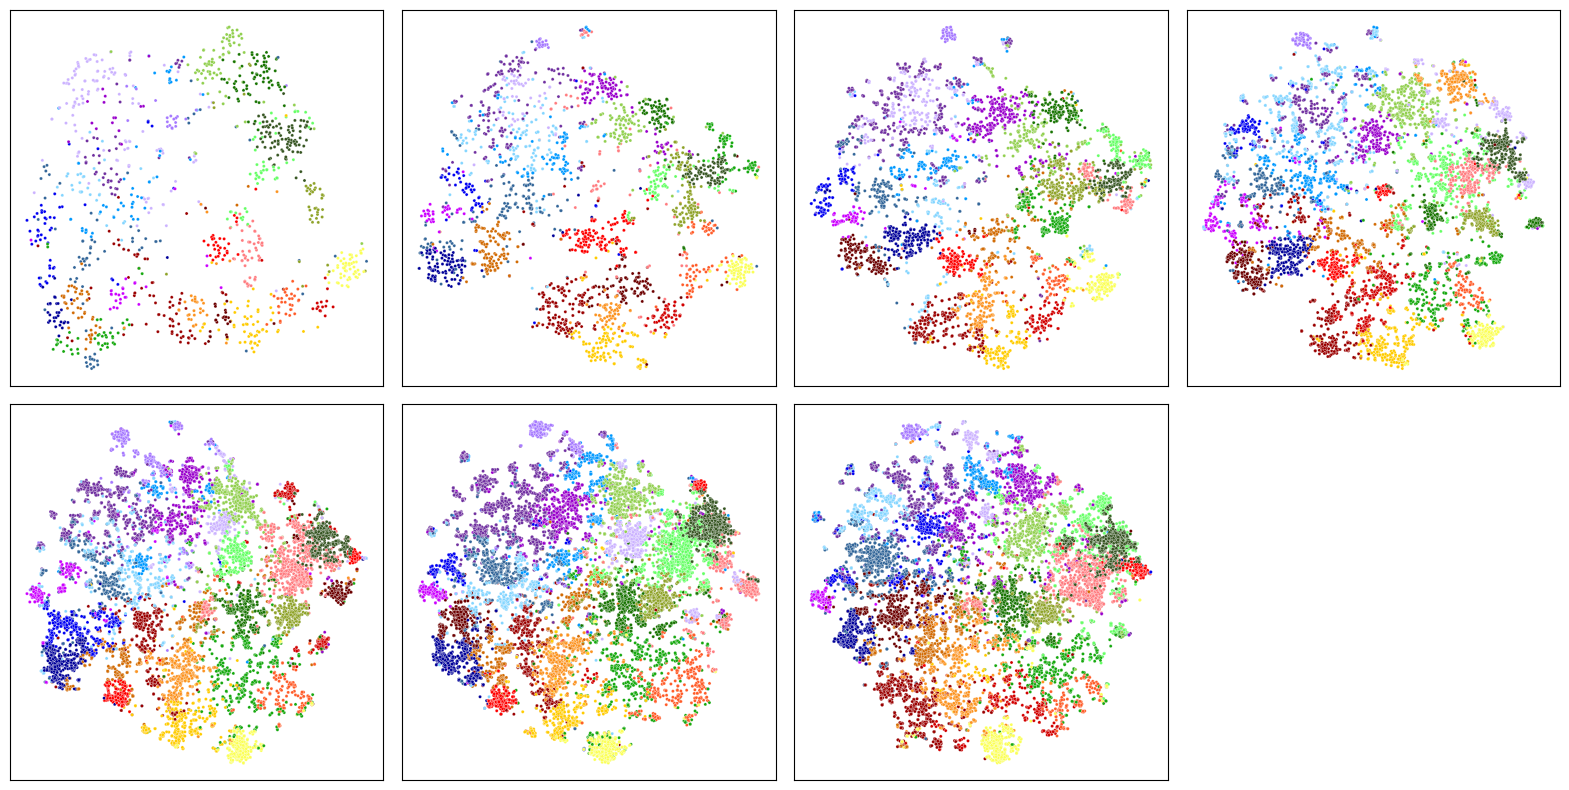

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

decades = ['1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s']
start_year_list, end_year_list = [1950, 1960, 1970, 1980, 1990, 2000, 2010], [1959, 1969, 1979, 1989, 1999, 2009, 2021]
d, w = 100, 10

fig = plt.figure(layout='constrained')
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
plt.subplots_adjust(wspace=0.05, hspace=0.05)
axes = axes.flatten()
for i, cluster_df in enumerate(cluster_df_list):
        start_year, end_year = start_year_list[i], end_year_list[i]
        wv = model.load_wv(start_year, end_year, d, w)
        all_vectors = wv.get_normed_vectors()
        all_VIDs = wv.index_to_key
        valid_VIDs = cluster_df[cluster_df['Scopus_label']!='Multidisciplinary']['VID'].values
        valid_vectors = all_vectors[[all_VIDs.index(VID) for VID in valid_VIDs]]
        cluster2scopus,  similarity_matrix = match_labels_by_centroids(cluster_df[cluster_df['Scopus_label']!='Multidisciplinary']['cluster_label'], 
                                                                        cluster_df[cluster_df['Scopus_label']!='Multidisciplinary']['Scopus_label'], 
                                                                        valid_vectors)
        cluster2color = {k: model.discipline2color[v] for k, v in cluster2scopus.items() if v in model.discipline2color}

        ax = axes[i]
        if i in [1, 2, 3]:
                cluster_df['x_val'] = -1 * cluster_df['x_val']
        scatter = sns.scatterplot(data=cluster_df, x='x_val', y='y_val', 
                                  hue='cluster_label', palette=cluster2color, s=5,
                                  ax=ax)
        ax.legend().set_visible(False)
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_xticks([])
        ax.set_yticks([])

axes[-1].axis('off')

In [96]:
# check the min/max values of sim_socre, to determine the color scale
all_sim_score = []
for cluster_df in cluster_df_list:
    print(cluster_df.sim_score.max(), cluster_df.sim_score.min())
    all_sim_score.append(cluster_df_list[0].sim_score.values)

# calculate the mean of the interpolated values, to map the netural value to white
sim_score_mean = np.mean(np.vstack(all_sim_score))
sim_score_mean

0.7 0.002849002849002802
0.9473684210526315 0.0019305019305018156
0.7989949748743719 0.0011235955056179137
0.793969849246231 0.0006954102920722072
0.7699386503067485 0.00043610989969455893
0.7140077821011672 0.00025542784163479215
0.8075370121130552 0.00021579628830370456


0.2582643827080811

Text(0.5, 0.02, 'Clustering Similarity')

<Figure size 640x480 with 0 Axes>

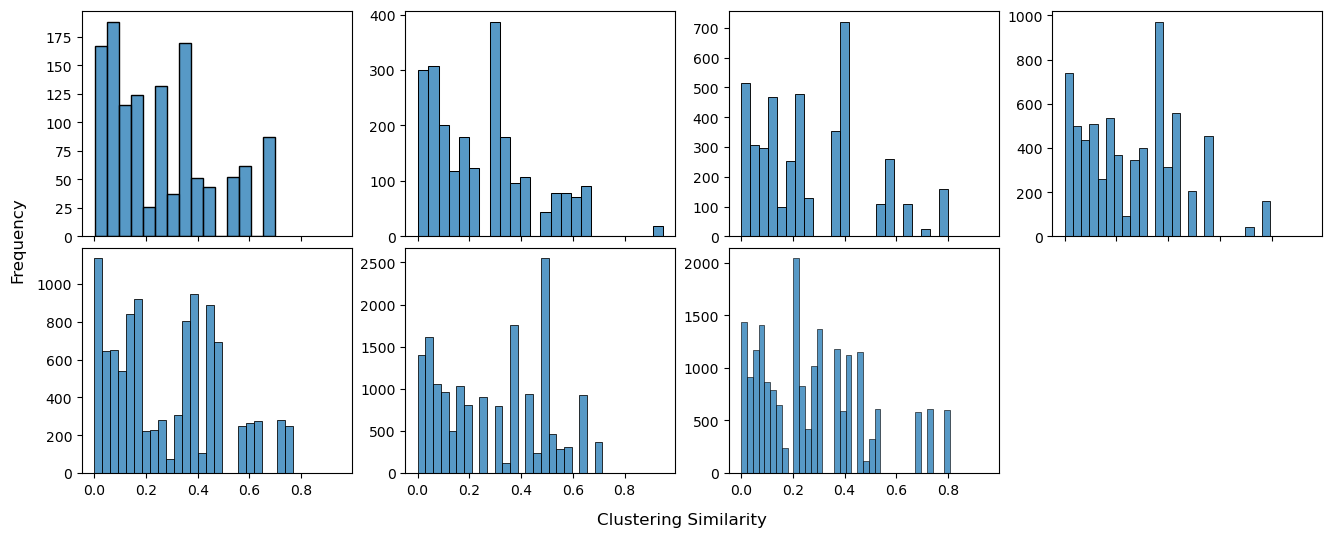

In [149]:
fig = plt.figure(layout='constrained')
fig, axes = plt.subplots(2, 4, figsize=(16, 6), sharex=True)
plt.subplots_adjust(wspace=0.2, hspace=0.05)
axes = axes.flatten()
for i, cluster_df in enumerate(cluster_df_list):
        ax = axes[i]
        sns.histplot(cluster_df.sim_score, ax=ax)
        ax.set_ylabel('')
        ax.set_xlabel('')
axes[-1].axis('off')
fig.supylabel('Frequency', x=0.08, y=0.5)
fig.supxlabel('Clustering Similarity', x=0.5, y=0.02)

Text(0.5, 0.02, 'Cosine distance to the nearest clustering center')

<Figure size 640x480 with 0 Axes>

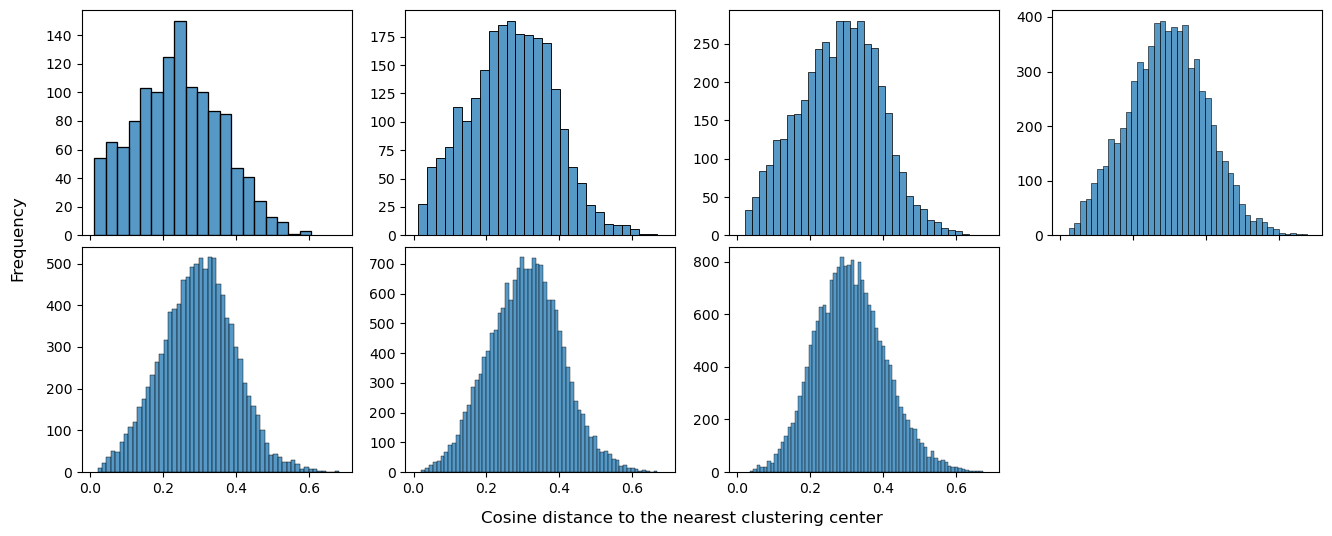

In [151]:
fig = plt.figure(layout='constrained')
fig, axes = plt.subplots(2, 4, figsize=(16, 6), sharex=True)
plt.subplots_adjust(wspace=0.2, hspace=0.05)
axes = axes.flatten()
for i, cluster_df in enumerate(cluster_df_list):
        ax = axes[i]
        sns.histplot(cluster_df.closest_center_distance, ax=ax)
        ax.set_ylabel('')
        ax.set_xlabel('')
axes[-1].axis('off')
fig.supylabel('Frequency', x=0.08, y=0.5)
fig.supxlabel('Cosine distance to the nearest clustering center', x=0.5, y=0.02)

In [239]:
model.labeled_journal_info_df

VenueType                                      OriginalVenue  \
VenueID                                                                   
194691280    Journal                                 Annalen der Physik   
177993953    Journal                       Journal of Literacy Research   
168309380    Journal                             Philosophical Magazine   
93133213     Journal                   Western Journal of Communication   
179784352    Journal                           Journal of Women & Aging   
...              ...                                                ...   
3207474444   Journal   Journal of Statistics and Data Science Education   
3165397051   Journal  Fixed Point Theory and Algorithms for Sciences...   
3205933193   Journal                                                LHB   
3205081216   Journal                                          All Earth   
2483380313   Journal             ACM Transactions on Parallel Computing   

                                                   ScopusName  \
VenueID                                                         
194691280                                  Annalen der Physik   
177993953                        Journal of Literacy Research   
168309380                              Philosophical Magazine   
93133213                     Western Journal of Communication   
179784352                          Journal of Women and Aging   
...                                                       ...   
3207474444   Journal of Statistics and Data Science Education   
3165397051  Fixed Point Theory and Algorithms for Sciences...   
3205933193                          LHB: Hydroscience Journal   
3205081216                                          All Earth   
2483380313             ACM Transactions on Parallel Computing   

                                               ScopusCategory InceptionYear  
VenueID                                                                      
194691280                       General Physics and Astronomy          1790  
177993953   Linguistics and Language;;Language and Linguis...          1969  
168309380                            Condensed Matter Physics          1798  
93133213              Language and Linguistics;;Communication          None  
179784352          Geriatrics and Gerontology;;Gender Studies          None  
...                                                       ...           ...  
3207474444  Management Science and Operations Research;;Ed...          None  
3165397051         Applied Mathematics;;Geometry and Topology          None  
3205933193                       Water Science and Technology          None  
3205081216  General Earth and Planetary Sciences;;Manageme...          None  
2483380313  Computational Theory and Mathematics;;Computer...          None  

[22364 rows x 5 columns]

In [296]:
decades = ['1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s']

# 初始化合并结果，按 VID 合并
series_df = cluster_df_list[0][['VID', 'sim_score', 'closest_center_distance']].copy()
series_df['decade'] = decades[0]
series_df.set_index(['VID', 'decade'], inplace=True)

for idx, cluster_df in enumerate(cluster_df_list[1:], start=1):
    # 修改 sim_score 和 closest_center_distance 列的名称
    cluster_df = cluster_df[['VID', 'sim_score', 'closest_center_distance']].copy()
    cluster_df['decade'] = decades[idx]
    cluster_df.set_index(['VID', 'decade'], inplace=True)
    # 按 VID 合并
    series_df = pd.concat([series_df, cluster_df])

series_df = series_df.reset_index().set_index('VID')
# series_df = series_df.join(model.MAG_venue_info_df[['VenueID', 'OriginalVenue']].set_index('VenueID'), how='left')
series_df = series_df.join(model.labeled_journal_info_df[['OriginalVenue',	'InceptionYear']], how='left')
series_df = series_df.rename(columns={'OriginalVenue': 'venue_name',
                                      'InceptionYear': 'inception_year'})

series_df = series_df.reset_index().set_index(['VID', 'venue_name','decade'])

display(series_df)


sim_score  \
VID          venue_name                                         decade              
1.377736e+08 Nature                                             1950s    0.065789   
1.402520e+08 Journal of Biological Chemistry                    1950s    0.185714   
1.111554e+08 Journal of the American Chemical Society           1950s    0.185714   
5.486237e+07 Physical Review                                    1950s    0.666667   
3.880285e+06 Science                                            1950s    0.065789   
...                                                                           ...   
2.764486e+09 The internet journal of the third world medicine   2010s    0.097324   
8.345432e+07 Publications of The English Goethe Society         2010s    0.459962   
1.650745e+07 Peritia                                            2010s    0.084561   
1.215097e+08 Biofutur                                           2010s    0.406273   
5.310736e+07 Industrial & Engineering Chemistry Process Desi... 2010s    0.004532   

                                                                        closest_center_distance  \
VID          venue_name                                         decade                            
1.377736e+08 Nature                                             1950s                  0.422928   
1.402520e+08 Journal of Biological Chemistry                    1950s                  0.253940   
1.111554e+08 Journal of the American Chemical Society           1950s                  0.248420   
5.486237e+07 Physical Review                                    1950s                  0.155218   
3.880285e+06 Science                                            1950s                  0.437083   
...                                                                                         ...   
2.764486e+09 The internet journal of the third world medicine   2010s                  0.268070   
8.345432e+07 Publications of The English Goethe Society         2010s                  0.034777   
1.650745e+07 Peritia                                            2010s                  0.113656   
1.215097e+08 Biofutur                                           2010s                  0.179111   
5.310736e+07 Industrial & Engineering Chemistry Process Desi... 2010s                  0.258839   

                                                                       inception_year  
VID          venue_name                                         decade                 
1.377736e+08 Nature                                             1950s            1869  
1.402520e+08 Journal of Biological Chemistry                    1950s            1905  
1.111554e+08 Journal of the American Chemical Society           1950s            1879  
5.486237e+07 Physical Review                                    1950s            1893  
3.880285e+06 Science                                            1950s            1880  
...                                                                               ...  
2.764486e+09 The internet journal of the third world medicine   2010s            None  
8.345432e+07 Publications of The English Goethe Society         2010s            None  
1.650745e+07 Peritia                                            2010s            1982  
1.215097e+08 Biofutur                                           2010s            None  
5.310736e+07 Industrial & Engineering Chemistry Process Desi... 2010s            None  

[62478 rows x 3 columns]

In [297]:
VIDs = series_df.index.get_level_values('VID').unique()

# 获取每个VID的decade列表
vid_decades = series_df.reset_index().groupby('VID')['decade'].apply(list)

# 筛选出decade连续且结尾为2010s的VID
def is_valid_decades(decades_series):
    return decades_series == decades[-len(decades_series):]

valid_VIDs = [vid for vid in VIDs if is_valid_decades(vid_decades[vid])]

series_df = series_df.loc[valid_VIDs]

display(series_df)

sim_score  \
VID          venue_name                                    decade              
1.377736e+08 Nature                                        1950s    0.065789   
                                                           1960s    0.026490   
                                                           1970s    0.014851   
                                                           1980s    0.012195   
                                                           1990s    0.009112   
...                                                                      ...   
3.605715e+07 Ploughshares                                  2010s    0.459962   
6.501323e+07 Rivista di Filologia e di Istruzione Classica 2010s    0.459962   
2.737521e+09 SPERMOVA                                      2010s    0.063457   
1.596632e+08 Histoire & Sociétés Rurales                   2010s    0.084561   
8.345432e+07 Publications of The English Goethe Society    2010s    0.459962   

                                                                   closest_center_distance  \
VID          venue_name                                    decade                            
1.377736e+08 Nature                                        1950s                  0.422928   
                                                           1960s                  0.410177   
                                                           1970s                  0.395198   
                                                           1980s                  0.427142   
                                                           1990s                  0.424493   
...                                                                                    ...   
3.605715e+07 Ploughshares                                  2010s                  0.107594   
6.501323e+07 Rivista di Filologia e di Istruzione Classica 2010s                  0.106333   
2.737521e+09 SPERMOVA                                      2010s                  0.190921   
1.596632e+08 Histoire & Sociétés Rurales                   2010s                  0.239244   
8.345432e+07 Publications of The English Goethe Society    2010s                  0.034777   

                                                                  inception_year  
VID          venue_name                                    decade                 
1.377736e+08 Nature                                        1950s            1869  
                                                           1960s            1869  
                                                           1970s            1869  
                                                           1980s            1869  
                                                           1990s            1869  
...                                                                          ...  
3.605715e+07 Ploughshares                                  2010s            None  
6.501323e+07 Rivista di Filologia e di Istruzione Classica 2010s            1873  
2.737521e+09 SPERMOVA                                      2010s            None  
1.596632e+08 Histoire & Sociétés Rurales                   2010s            None  
8.345432e+07 Publications of The English Goethe Society    2010s            None  

[57492 rows x 3 columns]

In [269]:
rows = series_df.xs('Science', level='venue_name')
display(rows)

sim_score  closest_center_distance inception_year age_group
VID       decade                                                             
3880285.0 1950s    0.065789                 0.437083           1880     1950s
          1960s    0.026490                 0.468478           1880     1950s
          1970s    0.014851                 0.532130           1880     1950s
          1980s    0.012195                 0.541060           1880     1950s
          1990s    0.009112                 0.431575           1880     1950s
          2000s    0.004499                 0.527088           1880     1950s
          2010s    0.004789                 0.618842           1880     1950s

In [244]:
series_df.groupby('venue_name').mean(numeric_only=True).sort_values('sim_score', ascending=True).head(20)

sim_score  \
venue_name                                                      
Healthcare technology letters                        0.000216   
New directions for student leadership                0.000216   
Journal of investigative medicine high impact c...   0.000307   
Scholarly Research Exchange                          0.000505   
Studium                                              0.000647   
Bioengineering                                       0.000679   
Cell Biology Education                               0.000730   
Aiha Journal                                         0.000766   
Quaker Studies                                       0.000779   
Biomedical Physics & Engineering Express             0.000798   
Psychotherapy and Politics International             0.000833   
Problems of Economic Transition                      0.000845   
Transactions of The Newcomen Society                 0.000848   
Revue Française des Laboratoires                     0.000850   
Journal of Systems Science and Information           0.000868   
Science Technology & Society                         0.000903   
Journal of International Peacekeeping                0.000903   
The Acorn                                            0.000986   
Journal of Medical Biography                         0.000994   
International Journal of Medicine and Surgery        0.001033   

                                                    closest_center_distance  
venue_name                                                                   
Healthcare technology letters                                      0.394066  
New directions for student leadership                              0.276094  
Journal of investigative medicine high impact c...                 0.250382  
Scholarly Research Exchange                                        0.617007  
Studium                                                            0.216391  
Bioengineering                                                     0.514915  
Cell Biology Education                                             0.469933  
Aiha Journal                                                       0.544350  
Quaker Studies                                                     0.124449  
Biomedical Physics & Engineering Express                           0.566038  
Psychotherapy and Politics International                           0.318388  
Problems of Economic Transition                                    0.164643  
Transactions of The Newcomen Society                               0.382345  
Revue Française des Laboratoires                                   0.444496  
Journal of Systems Science and Information                         0.352790  
Science Technology & Society                                       0.358969  
Journal of International Peacekeeping                              0.137320  
The Acorn                                                          0.301163  
Journal of Medical Biography                                       0.512112  
International Journal of Medicine and Surgery                      0.396997

<Axes: xlabel='decade', ylabel='sim_score'>

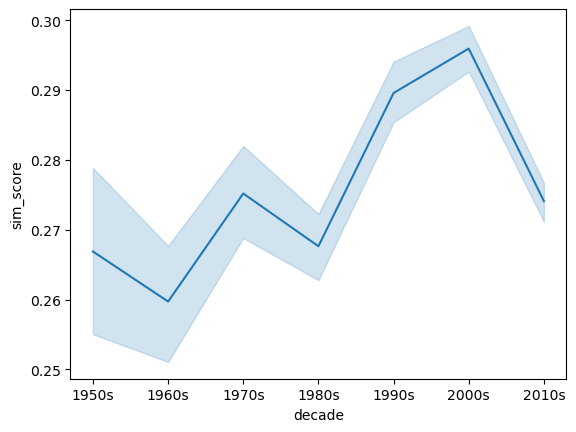

In [298]:
sns.lineplot(data=series_df, x='decade', y='sim_score')

<Axes: xlabel='decade', ylabel='closest_center_distance'>

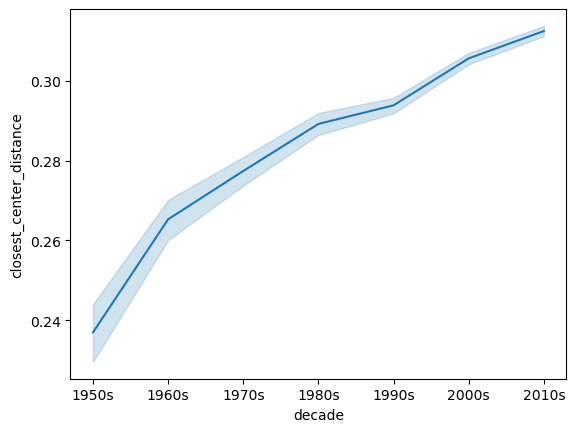

In [299]:
sns.lineplot(data=series_df, x='decade', y='closest_center_distance')

<Figure size 640x480 with 0 Axes>

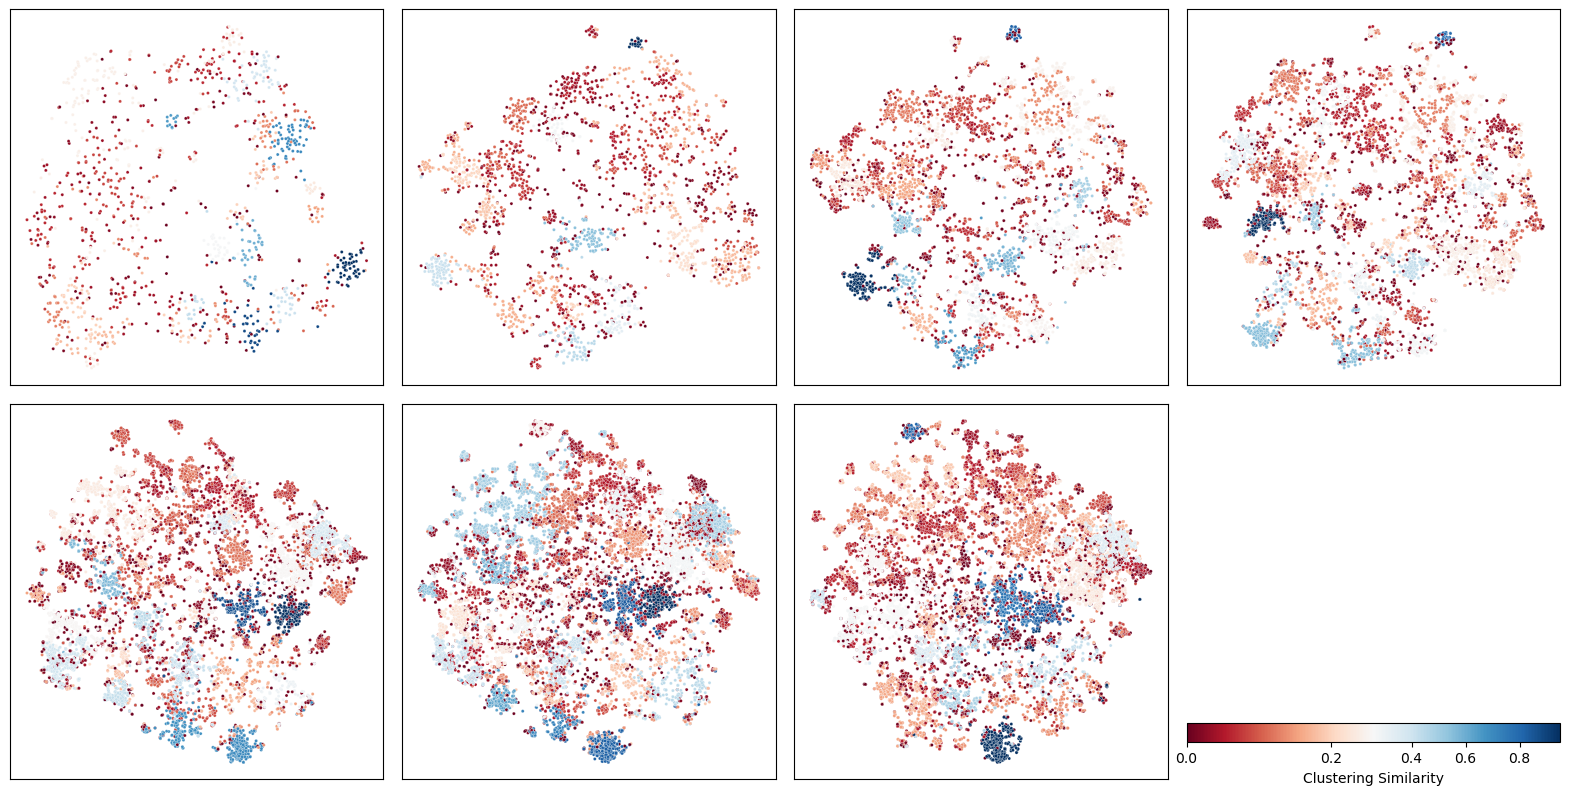

In [ ]:
from matplotlib.colors import TwoSlopeNorm
decades = ['1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s']
axes_lim_list = []

cmap = plt.get_cmap('RdBu')
vmin, vmax = 0.0, 0.95
midpoint = sim_score_mean        
# use TwoSlopeNorm to ensure 0 is mapped to the neutral color in the cmap 在 0
norm = TwoSlopeNorm(vcenter=midpoint, vmin=vmin, vmax=vmax)

fig = plt.figure(layout='constrained')
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
plt.subplots_adjust(wspace=0.05, hspace=0.05)
axes = axes.flatten()
for i, cluster_df in enumerate(cluster_df_list):
        ax = axes[i]
        if i in [1, 2, 3]:
                cluster_df['x_val'] = -1 * cluster_df['x_val']
        scatter = sns.scatterplot(data=cluster_df, x='x_val', y='y_val', 
                                  hue='sim_score', palette='RdBu', s=5,
                                  ax=ax, legend=False)
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_xticks([])
        ax.set_yticks([])
        axes_lim_list.append((ax.get_xlim(), ax.get_ylim()))

axes[-1].axis('off')
sm = plt.cm.ScalarMappable(cmap="RdBu", norm=norm)
sm.set_array([])
plt.colorbar(sm, label="Clustering Similarity", ax=axes[-1], orientation='horizontal')

In [ ]:
def make_grid(resolution, xlim, ylim):
    resolution = 128 # grid resolution

    X_vals = np.linspace(xlim[0], xlim[1], resolution)
    Y_vals = np.linspace(ylim[0], ylim[1], resolution)
    X_mesh, Y_mesh = np.meshgrid(X_vals, Y_vals)
    X_mesh = X_mesh.flatten()
    Y_mesh = Y_mesh.flatten()

    print('num of coords:', X_mesh.shape)
    return X_mesh, Y_mesh

def distance_matrix(x0, y0, x1, y1):
    """ 
    Make a distance matrix between pairwise observations.
    Note: from <http://stackoverflow.com/questions/1871536> 
    """
    
    obs = np.vstack((x0, y0)).T
    interp = np.vstack((x1, y1)).T

    d0 = np.subtract.outer(obs[:,0], interp[:,0])
    d1 = np.subtract.outer(obs[:,1], interp[:,1])
    
    # calculate hypotenuse
    return np.hypot(d0, d1)

def simple_idw(x, y, z, xi, yi, power=1):
    """ 
    Simple inverse distance weighted (IDW) interpolation 
    Weights are proportional to the inverse of the distance, so as the distance
    increases, the weights decrease rapidly.
    The rate at which the weights decrease is dependent on the value of power.
    As power increases, the weights for distant points decrease rapidly.
    """
    
    dist = distance_matrix(x,y, xi,yi)
    # In IDW, weights are 1 / distance
    weights = 1.0/(dist+1e-12)**power
    # Make weights sum to one
    weights /= weights.sum(axis=0)

    # Multiply the weights for each interpolated point by all observed Z-values
    return np.dot(weights.T, z)

decades = ['1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s']
z_list = []
pred_z_list = []
mean_z_list = []

for i, cluster_df in enumerate(cluster_df_list):
    print('start processing', decades[i])
    z_list.append(cluster_df['sim_score'])
    mean_z_list.append(cluster_df['sim_score'].mean())
    xlim, ylim = axes_lim_list[i]
    print('xlim:', xlim, 'ylim:', ylim)
    X_mesh, Y_mesh = make_grid(128, xlim, ylim)
    pred_z = simple_idw(cluster_df["x_val"], cluster_df["y_val"], cluster_df["sim_score"], X_mesh, Y_mesh, power=2)
    pred_z_list.append(pred_z)
    print('finish processing', decades[i])

# calculate the mean of the interpolated values, to map the netural value to white
pred_z_mean = np.mean(np.vstack(pred_z_list))
pred_z_mean

start processing 1950s
xlim: (-44.523362159729004, 52.85626697540283) ylim: (-40.21115665435791, 43.59002857208252)
num of coords: (16384,)
finish processing 1950s
start processing 1960s
xlim: (-59.90125617980957, 56.24754676818848) ylim: (-60.24988651275635, 62.75086688995361)
num of coords: (16384,)
finish processing 1960s
start processing 1970s
xlim: (-75.36875534057617, 73.46047592163086) ylim: (-79.06127700805663, 79.54018936157226)
num of coords: (16384,)
finish processing 1970s
start processing 1980s
xlim: (-82.13428535461426, 81.71211280822754) ylim: (-88.44856643676758, 87.72473526000977)
num of coords: (16384,)
finish processing 1980s
start processing 1990s
xlim: (-94.61478424072266, 98.68097686767578) ylim: (-99.7365161895752, 101.13696022033692)
num of coords: (16384,)
finish processing 1990s
start processing 2000s
xlim: (-102.92683258056641, 106.6997055053711) ylim: (-110.45190505981445, 110.5083625793457)
num of coords: (16384,)
finish processing 2000s
start processing 20

0.2710309797025685

num of coords: (16384,)
num of coords: (16384,)
num of coords: (16384,)
num of coords: (16384,)
num of coords: (16384,)
num of coords: (16384,)
num of coords: (16384,)


<Figure size 640x480 with 0 Axes>

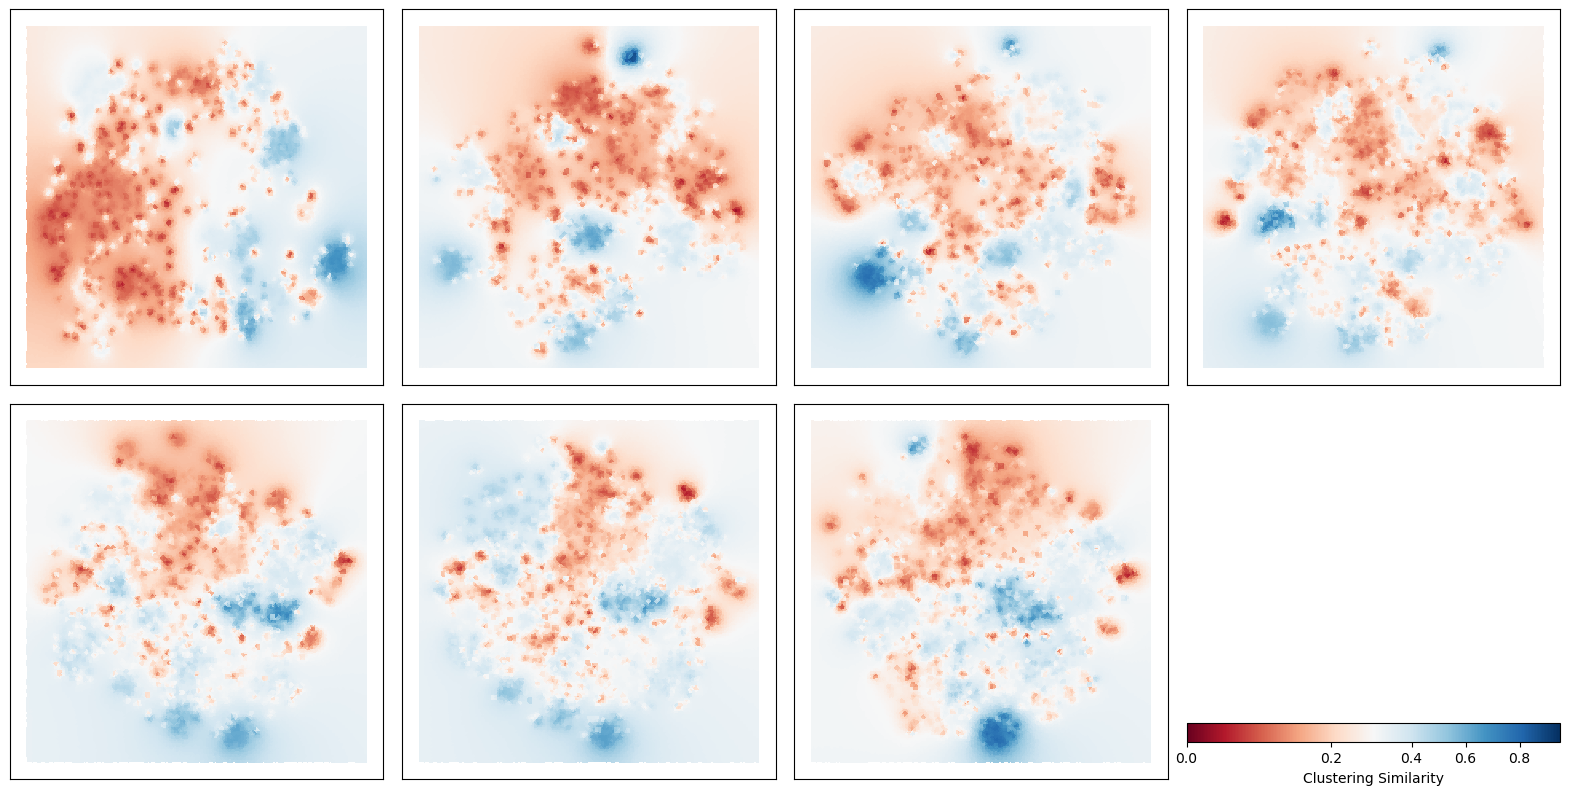

In [ ]:
from matplotlib.colors import TwoSlopeNorm
decades = ['1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s']

cmap = plt.get_cmap('RdBu')
vmin, vmax = 0.0, 0.95
midpoint = sim_score_mean        
# use TwoSlopeNorm to ensure 0 is mapped to the neutral color in the cmap 在 0
norm = TwoSlopeNorm(vcenter=midpoint, vmin=vmin, vmax=vmax)

fig = plt.figure(layout='constrained')
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
plt.subplots_adjust(wspace=0.05, hspace=0.05)
axes = axes.flatten()
for i, cluster_df in enumerate(cluster_df_list):
        ax = axes[i]
        if i in [1, 2, 3]:
                cluster_df['x_val'] = -1 * cluster_df['x_val']
        xlim, ylim = axes_lim_list[i]
        X_mesh, Y_mesh = make_grid(128, xlim, ylim)

        cs = ax.tripcolor(X_mesh, Y_mesh, pred_z_list[i], shading='flat', cmap=cmap, norm=norm)
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_xticks([])
        ax.set_yticks([])

axes[-1].axis('off')
sm = plt.cm.ScalarMappable(cmap="RdBu", norm=norm)
sm.set_array([])
plt.colorbar(sm, label="Clustering Similarity", ax=axes[-1], orientation='horizontal')